In [1]:
include("../../../riskMeasure.jl")
include("../../../utils.jl")
using DataFrames
using Plots
using LaTeXStrings

In [2]:
s1a1 = distribution([-600,600], [0.25,0.75])
s1a2 = distribution([0],  [1.0])
s1a3 = distribution([-100,400], [0.5,0.5])
s2 = distribution([200], [1.0])
pS = [0.5,0.5]
Alpha = collect(LinRange(0,1,1001))
s1a1CVaR = CVaR(s1a1,Alpha);
s1a2CVaR = CVaR(s1a2,Alpha);
s1a3CVaR = CVaR(s1a3,Alpha);
s1optCVaR = Base.max.(s1a1CVaR,s1a2CVaR,s1a3CVaR);
s1opt = CVaR2D( s1optCVaR , Alpha);

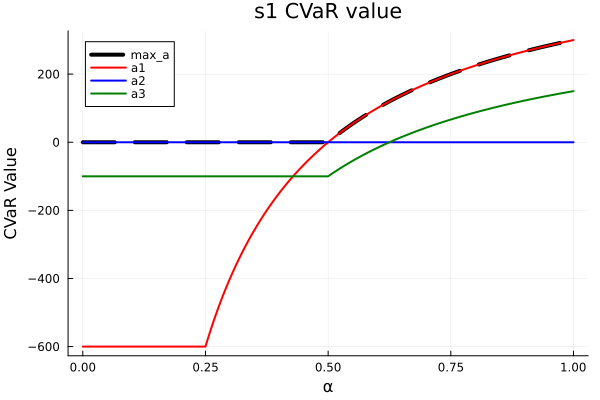

In [3]:
plot(
    Alpha,
    [s1optCVaR s1a1CVaR s1a2CVaR s1a3CVaR],
    title="s1 CVaR value",
    label=["max_a" "a1" "a2" "a3"],
    linestyle = [:dash :solid :solid :solid],
    lc = ["black" "red" "blue" "green"],
    linewidth=[ 4 2 2 2 ])
ylabel!("CVaR Value")
xlabel!("α")

In [4]:
jointopt = distribution([s1opt.X;s2.X],[s1opt.p .* pS[1];s2.p .* pS[2]])
jointa1 = distribution([s1a1.X;s2.X],[s1a1.p .* pS[1];s2.p .* pS[2]])
jointa2 = distribution([s1a2.X;s2.X],[s1a2.p .* pS[1];s2.p .* pS[2]])
jointa3 = distribution([s1a3.X;s2.X],[s1a3.p .* pS[1];s2.p .* pS[2]])
jointExpectedCVaR = CVaR(jointopt,Alpha);
jointa1CVaR = CVaR(jointa1,Alpha);
jointa2CVaR = CVaR(jointa2,Alpha);
jointa3CVaR = CVaR(jointa3,Alpha);
jointoptCVaR = Base.max.(jointa1CVaR,jointa2CVaR,jointa3CVaR);
jointPerformCVaR = jointa2CVaR .* (abs.(jointExpectedCVaR .- jointa2CVaR) .< 1e-12) .+ jointa1CVaR .* (abs.(jointExpectedCVaR .- jointa2CVaR) .>= 1e-12);

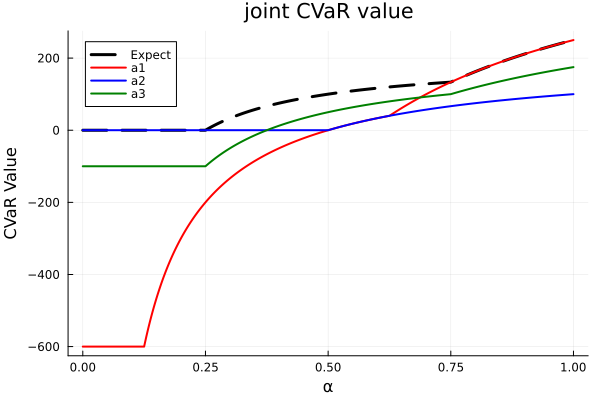

In [5]:
plot(
    Alpha,
    [jointExpectedCVaR jointa1CVaR jointa2CVaR jointa3CVaR],
    title="joint CVaR value", label=["Expect" "a1" "a2" "a3"], 
    linestyle = [:dash :solid :solid :solid],
    lc = ["black" "red" "blue" "green"],
    linewidth=[ 3 2 2 2 ])
ylabel!("CVaR Value")
xlabel!("α")

In [6]:
savefig(check_path("fig/jointCVaR.pdf"))

"c:\\GITHUB\\Dissertation-V2\\code\\experiments\\Dissertation\\Chapter 3\\fig\\jointCVaR.pdf"

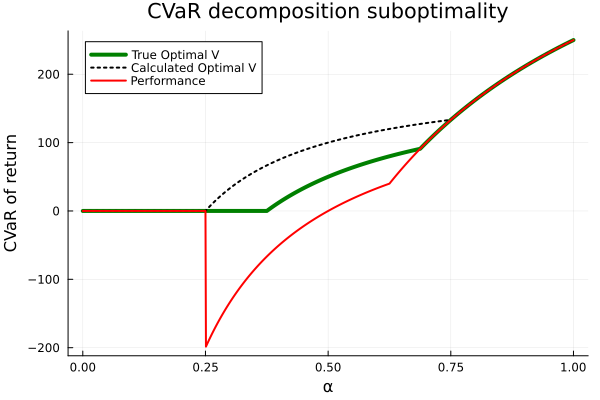

In [7]:
plot(
    Alpha,
    [jointoptCVaR jointExpectedCVaR jointPerformCVaR],
    title="CVaR decomposition suboptimality", 
    linestyle = [:solid :dot :solid],
    label=["True Optimal V" "Calculated Optimal V"  "Performance"], 
    lc = ["green" "black" "red"], 
    linewidth=[ 4 2 2 ])
ylabel!("CVaR of return")
xlabel!("α")

In [8]:
savefig(check_path("fig/CVaRsuboptimality2.pdf"))

"c:\\GITHUB\\Dissertation-V2\\code\\experiments\\Dissertation\\Chapter 3\\fig\\CVaRsuboptimality2.pdf"

## Plotting to pdf

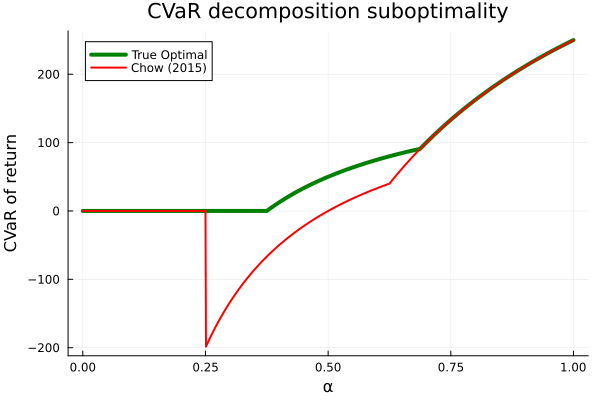

In [9]:
plot(
    Alpha,
    [jointoptCVaR jointPerformCVaR],
    title="CVaR decomposition suboptimality", 
    linestyle = [:solid :solid],
    label=["True Optimal" "Chow (2015)"], 
    lc = ["green" "red"], 
    linewidth=[4 2 ])
ylabel!("CVaR of return")
xlabel!("α")

In [10]:
savefig("fig/CVaRsuboptimality.pdf")

"c:\\GITHUB\\Dissertation-V2\\code\\experiments\\Dissertation\\Chapter 3\\fig\\CVaRsuboptimality.pdf"

## Inspecting $\zeta$ function at $\alpha=0.5$.

In [ ]:
Z = LinRange(0,1,10001)
Za1 = Base.max.( s2.X[1] .+ (s1a1.X[1] - s2.X[1]) .* Z , (s2.X[1] + (s1a1.X[1] - s2.X[1]) * s1a1.p[1]) .+ (s1a1.X[2] - s2.X[1]) .* (Z .- s1a1.p[1]))
Za2 = s2.X[1] .+ (s1a2.X[1] - s2.X[1]) .* Z
Za3 = Base.max.( s2.X[1] .+ (s1a3.X[1] - s2.X[1]) .* Z , (s2.X[1] + (s1a3.X[1] - s2.X[1]) * s1a3.p[1]) .+ (s1a3.X[2] - s2.X[1]) .* (Z .- s1a3.p[1]))
Zexp = Base.max.(Za1,Za2,Za3)

expI = argmin(Zexp)
expVal = minimum(Zexp)

trueI = argmin(Za3)
trueVal = minimum(Za3);

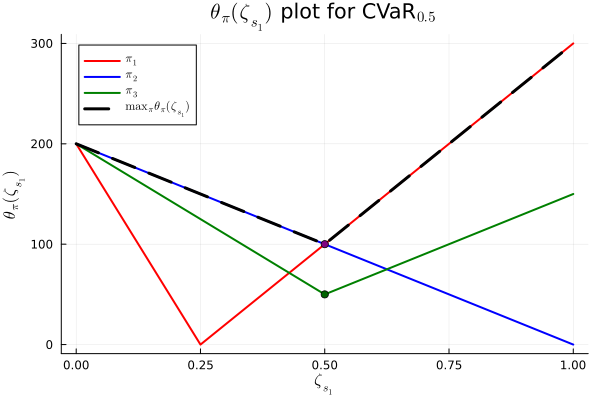

In [12]:
plot(
    Z,
    [Za1 Za2 Za3 Zexp],xlabel=L"\zeta_{s_1}", ylabel=L"\theta_{\pi}(\zeta_{s_1})",
    title=L"\theta_{\pi}(\zeta_{s_1})"*" plot for CVaR"*L"_{0.5}", 
    label=[L"\pi_1" L"\pi_2" L"\pi_3" L"\max_{\pi} \theta_{\pi}(\zeta_{s_1})"], 
    linestyle = [:solid :solid :solid :dash ],
    lc = ["red" "blue" "green" "black"], 
    linewidth=[ 2 2 2 3 ])
plot!([Z[expI]], [expVal], seriestype=:scatter,color="purple",label="")
plot!([Z[trueI]], [trueVal], seriestype=:scatter,color="darkgreen",label="")

In [13]:
savefig("fig/CVaR_exampleForAlpha50.pdf")

"c:\\GITHUB\\Dissertation-V2\\code\\experiments\\Dissertation\\Chapter 3\\fig\\CVaR_exampleForAlpha50.pdf"

For CVaR 50% in this case the the policy optimization risk decomposition would gives us the purple value $100$. However, the true optimal action a3 has a value of $50$. When one deploy the action suggested by the algorithm then they would receive $0$ instead of the optimal $50$ as their CVaR50%.

# General M and p(s2)

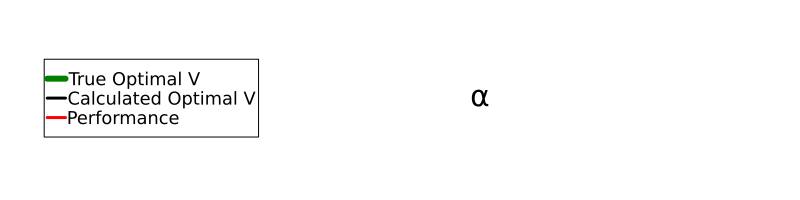

In [14]:
ptitle = plot(
    bg = :white,xlim = (-10, 10), ylim = (-1, 1),
    framestyle = :none,legend = false
)
annotate!( ptitle , [ (0,0,("CVaR decomposition suboptimality",20,:black)) ] )
pylabel = plot(
    bg = :white,xlim = (-10, 10), ylim = (-1, 1),
    framestyle = :none,legend = false
)
space = "                                                                                                              "
annotate!( pylabel , [ (0,0,text("$space-$space CVaR of return $space-$space",20,:center,rotation=90)) ] )
plegend = plot(
    [-100,-99],
    [[1,2] [1,2] [1,2]],
    linestyle = [:solid :dash :solid],
    label=["True Optimal V" "Calculated Optimal V"  "Performance"], 
    lc = ["green" "black" "red"], 
    linewidth=[ 4 2 2 ],
    bg = :white,xlim = (0, 1), ylim = (0, 1),
    framestyle = :none, legend = (0.1, 0.6), legendfontsize=12,size=(800,100)
)
pxlabel = plot(
    bg = :white,xlim = (-10, 10), ylim = (-1, 1),
    framestyle = :none,legend = false
)
annotate!( pxlabel , [ (-5,0,("α",20,:black)) ] )
bot = plot(plegend,pxlabel, layout=@layout([a{0.4w} b]),size = (800,200))


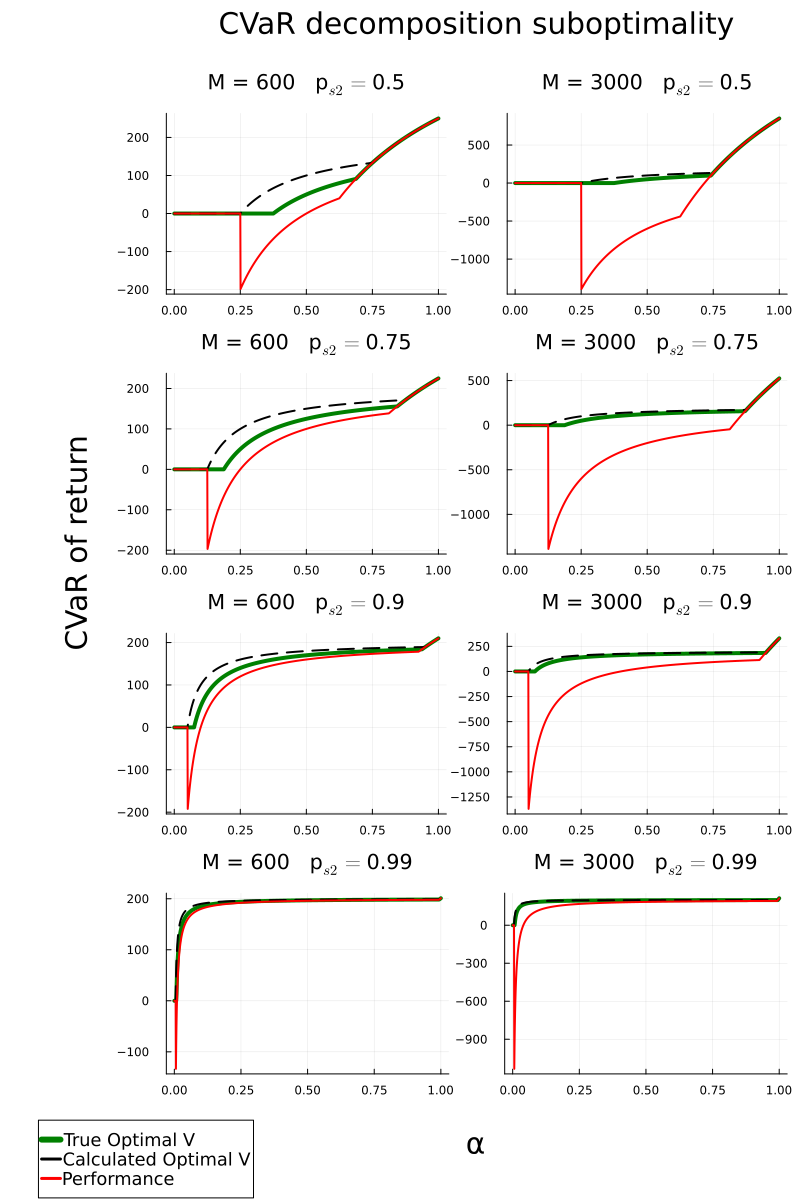

In [18]:
listOfPlot = []
listOfbindPlot = []
for ps0_2 in [0.5,0.75,0.9,0.99]
    listOfPlot = []
        for M in [600,3000]
        s1a1 = distribution( [-M,M],  [0.25,0.75])
        pS = [1-ps0_2,ps0_2]
        Alpha = collect(LinRange(0,1,1001))
        s1a1CVaR = CVaR(s1a1,Alpha);
        s1a2CVaR = CVaR(s1a2,Alpha);
        s1a3CVaR = CVaR(s1a3,Alpha);
        s1optCVaR = Base.max.(s1a1CVaR,s1a2CVaR,s1a3CVaR);
        s1opt = CVaR2D( s1optCVaR , Alpha);
        jointopt = distribution([s1opt.X;s2.X],[s1opt.p .* pS[1];s2.p .* pS[2]])
        jointa1 = distribution([s1a1.X;s2.X],[s1a1.p .* pS[1];s2.p .* pS[2]])
        jointa2 = distribution([s1a2.X;s2.X],[s1a2.p .* pS[1];s2.p .* pS[2]])
        jointa3 = distribution([s1a3.X;s2.X],[s1a3.p .* pS[1];s2.p .* pS[2]])
        jointExpectedCVaR = CVaR(jointopt,Alpha);
        jointa1CVaR = CVaR(jointa1,Alpha);
        jointa2CVaR = CVaR(jointa2,Alpha);
        jointa3CVaR = CVaR(jointa3,Alpha);
        jointoptCVaR = Base.max.(jointa1CVaR,jointa2CVaR,jointa3CVaR);
        jointPerformCVaR = jointa2CVaR .* (abs.(jointExpectedCVaR .- jointa2CVaR) .< 1e-12) .+ jointa1CVaR .* (abs.(jointExpectedCVaR .- jointa2CVaR) .>= 1e-12);
        tmp = plot(
            Alpha,
            [jointoptCVaR jointExpectedCVaR jointPerformCVaR],
            title="M = "*string(M)* "   p"*L"_{s2} = "* string(ps0_2), 
            linestyle = [:solid :dash :solid],
            label=["" "" ""], 
            lc = ["green" "black" "red"], 
            linewidth=[ 4 2 2 ])
        push!(listOfPlot,tmp)
    end
    bindplot = plot(listOfPlot[1],listOfPlot[2], layout = (1,2),size = (800,300))
    push!(listOfbindPlot,bindplot)
end
vertplot = plot(ptitle,listOfbindPlot[1],listOfbindPlot[2],listOfbindPlot[3],listOfbindPlot[4],layout = @layout([a{0.03h}; b; c; d; e]),size = (1200,900))
midtop =plot(pylabel, vertplot, layout=@layout([a{0.1w} b]),size = (800,1000))
plot(midtop,bot, layout=@layout([a; b{0.03h}]),size = (800,1200))


In [19]:
savefig("fig/CVaR_VariousInit.pdf")

"c:\\GITHUB\\Dissertation-V2\\code\\experiments\\Dissertation\\Chapter 3\\fig\\CVaR_VariousInit.pdf"